[*********************100%***********************]  1 of 1 completed


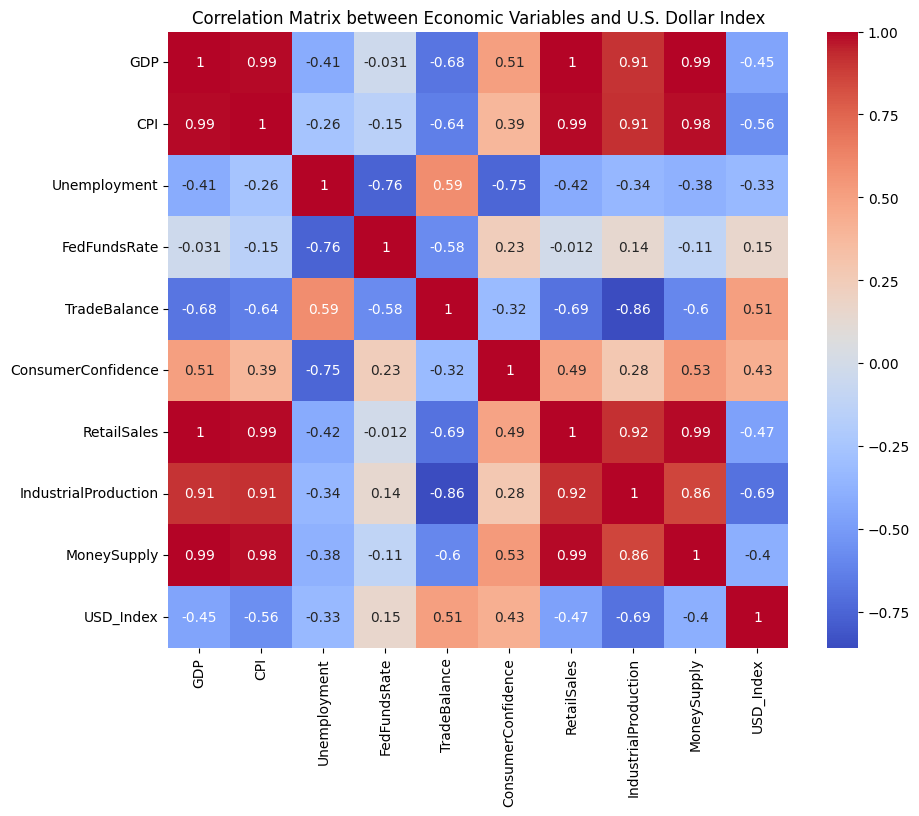

Mean Squared Error: 55.02103021141545
                      Coefficient
GDP                     -0.009033
CPI                     -1.505478
Unemployment            -0.352784
FedFundsRate             0.334322
TradeBalance            -0.000069
ConsumerConfidence       0.026272
RetailSales              0.000341
IndustrialProduction    -0.695779
MoneySupply              0.015334


In [2]:
import pandas as pd
import yfinance as yf
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize FRED API
fred_api_key = 'Enter Your Key'
fred = Fred(api_key=fred_api_key)

# List of economic variables to analyze
economic_indicators = {
    'GDP': 'GDP',
    'CPI': 'CPIAUCSL',
    'Unemployment': 'UNRATE',
    'FedFundsRate': 'FEDFUNDS',
    'TradeBalance': 'BOPGSTB',
    'ConsumerConfidence': 'UMCSENT',
    'RetailSales': 'RSXFS',
    'IndustrialProduction': 'INDPRO',
    'MoneySupply': 'M2'
}

# Fetch U.S. Dollar Index data from yfinance
start_date = '2000-01-01'
end_date = '2024-01-01'
usd_index = yf.download('DX-Y.NYB', start=start_date, end=end_date)

# Fetch data for economic variables
data = pd.DataFrame()
for key, fred_id in economic_indicators.items():
    data[key] = fred.get_series(fred_id, start=start_date, end=end_date)

# Combine the data into a single DataFrame
data['USD_Index'] = usd_index['Close']

# Data preprocessing (handle missing values, normalization, etc.)
data = data.dropna()

# Step 3: Correlation Analysis
correlation_matrix = data.corr()

# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Economic Variables and U.S. Dollar Index')
plt.show()

# Step 4: Regression Analysis
X = data.drop(columns=['USD_Index'])
y = data['USD_Index']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
